In [77]:
import pandas as pd
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import sklearn.preprocessing as preprocessing
from scipy.stats import spearmanr
import seaborn as sn

In [2]:
data = pd.read_csv('Indicators.csv')
data.shape

(5656458, 6)

In [57]:
# label encode categorical data
def labelEncode(data):
    for i in data.columns:
        if i != 'CountryCode':
            le = preprocessing.LabelEncoder()
            le.fit(data[i])
            data[i]= le.transform(data[i])

In [4]:
data['IndicatorName'].value_counts()

Population, total                                                                              13484
Population growth (annual %)                                                                   13442
Urban population (% of total)                                                                  13415
Rural population (% of total population)                                                       13415
Urban population                                                                               13374
                                                                                               ...  
Present value of external debt (% of exports of goods, services and primary income)               69
Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)         67
Benefits incidence in poorest quintile (%) - All Labor Market                                     67
Survey mean consumption or income per capita, total population (2005 PPP $ per day)        

In [5]:
# lifetime
lifetime = data[data['IndicatorName'] == 'Life expectancy at birth, total (years)']
lifetime.head()

SyntaxError: invalid syntax (<ipython-input-5-a22afebcad48>, line 3)

In [ ]:
lifetime=lifetime.drop(columns=['IndicatorCode', 'IndicatorName', 'CountryName'])
lifetime.head()

In [ ]:
lifetime.rename(columns={"Value": "life_Value"}, inplace = True)
lifetime.head()

In [ ]:
country = pd.read_csv('Country.csv')
country.head()

In [ ]:
country = country.drop(columns=['ShortName', 'TableName', 'LongName', 'Alpha2Code', 'Wb2Code', 'CurrencyUnit', 'SpecialNotes'])
country.head()

In [ ]:
merged = pd.merge(country, lifetime)
merged

In [12]:
merged.columns

Index(['CountryCode', 'Region', 'IncomeGroup', 'NationalAccountsBaseYear',
       'NationalAccountsReferenceYear', 'SnaPriceValuation', 'LendingCategory',
       'OtherGroups', 'SystemOfNationalAccounts',
       'AlternativeConversionFactor', 'PppSurveyYear',
       'BalanceOfPaymentsManualInUse', 'ExternalDebtReportingStatus',
       'SystemOfTrade', 'GovernmentAccountingConcept',
       'ImfDataDisseminationStandard', 'LatestPopulationCensus',
       'LatestHouseholdSurvey', 'SourceOfMostRecentIncomeAndExpenditureData',
       'VitalRegistrationComplete', 'LatestAgriculturalCensus',
       'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData',
       'Year', 'life_Value'],
      dtype='object')

In [13]:
# population
population = data[data['IndicatorName'] == 'Population, total']
population.head()

CountryName CountryCode      IndicatorName  \
73                                Arab World         ARB  Population, total   
150                   Caribbean small states         CSS  Population, total   
221           Central Europe and the Baltics         CEB  Population, total   
341  East Asia & Pacific (all income levels)         EAS  Population, total   
462    East Asia & Pacific (developing only)         EAP  Population, total   

    IndicatorCode  Year         Value  
73    SP.POP.TOTL  1960  9.249590e+07  
150   SP.POP.TOTL  1960  4.190810e+06  
221   SP.POP.TOTL  1960  9.140158e+07  
341   SP.POP.TOTL  1960  1.042475e+09  
462   SP.POP.TOTL  1960  8.964930e+08

In [14]:
population.rename(columns={"Value": "pop_Value"}, inplace = True)
population.head()

c:\users\parksoyoung\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


CountryName CountryCode      IndicatorName  \
73                                Arab World         ARB  Population, total   
150                   Caribbean small states         CSS  Population, total   
221           Central Europe and the Baltics         CEB  Population, total   
341  East Asia & Pacific (all income levels)         EAS  Population, total   
462    East Asia & Pacific (developing only)         EAP  Population, total   

    IndicatorCode  Year     pop_Value  
73    SP.POP.TOTL  1960  9.249590e+07  
150   SP.POP.TOTL  1960  4.190810e+06  
221   SP.POP.TOTL  1960  9.140158e+07  
341   SP.POP.TOTL  1960  1.042475e+09  
462   SP.POP.TOTL  1960  8.964930e+08

In [15]:
population=population.drop(columns=['IndicatorCode', 'IndicatorName', 'CountryName'])
population.head()

CountryCode  Year     pop_Value
73          ARB  1960  9.249590e+07
150         CSS  1960  4.190810e+06
221         CEB  1960  9.140158e+07
341         EAS  1960  1.042475e+09
462         EAP  1960  8.964930e+08

In [16]:
# death
death= data[data['IndicatorName'] == 'Death rate, crude (per 1,000 people)']
death.head()

CountryName CountryCode  \
13                                Arab World         ARB   
91                    Caribbean small states         CSS   
178           Central Europe and the Baltics         CEB   
252  East Asia & Pacific (all income levels)         EAS   
368    East Asia & Pacific (developing only)         EAP   

                            IndicatorName   IndicatorCode  Year      Value  
13   Death rate, crude (per 1,000 people)  SP.DYN.CDRT.IN  1960  19.754452  
91   Death rate, crude (per 1,000 people)  SP.DYN.CDRT.IN  1960   9.813167  
178  Death rate, crude (per 1,000 people)  SP.DYN.CDRT.IN  1960   8.632177  
252  Death rate, crude (per 1,000 people)  SP.DYN.CDRT.IN  1960  20.982881  
368  Death rate, crude (per 1,000 people)  SP.DYN.CDRT.IN  1960  22.973689

In [17]:
death.rename(columns={"Value": "death_Value"}, inplace = True)
death=death.drop(columns=['IndicatorCode', 'IndicatorName', 'CountryName'])
death.head()

CountryCode  Year  death_Value
13          ARB  1960    19.754452
91          CSS  1960     9.813167
178         CEB  1960     8.632177
252         EAS  1960    20.982881
368         EAP  1960    22.973689

In [34]:
# birth
birth= data[data['IndicatorName'] == 'Birth rate, crude (per 1,000 people)']
birth.head()

CountryName CountryCode  \
6                                 Arab World         ARB   
84                    Caribbean small states         CSS   
164           Central Europe and the Baltics         CEB   
236  East Asia & Pacific (all income levels)         EAS   
359    East Asia & Pacific (developing only)         EAP   

                            IndicatorName   IndicatorCode  Year      Value  
6    Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  1960  47.697888  
84   Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  1960  40.017001  
164  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  1960  19.117435  
236  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  1960  26.362350  
359  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  1960  26.635950

In [35]:
birth.rename(columns={"Value": "birth_Value"}, inplace = True)
birth=birth.drop(columns=['IndicatorCode', 'IndicatorName', 'CountryName'])
birth.head()

CountryCode  Year  birth_Value
6           ARB  1960    47.697888
84          CSS  1960    40.017001
164         CEB  1960    19.117435
236         EAS  1960    26.362350
359         EAP  1960    26.635950

In [58]:
country = pd.read_csv('Country.csv')
country.head()

CountryCode       ShortName       TableName  \
0         AFG     Afghanistan     Afghanistan   
1         ALB         Albania         Albania   
2         DZA         Algeria         Algeria   
3         ASM  American Samoa  American Samoa   
4         ADO         Andorra         Andorra   

                                  LongName Alpha2Code    CurrencyUnit  \
0             Islamic State of Afghanistan         AF  Afghan afghani   
1                      Republic of Albania         AL    Albanian lek   
2  People's Democratic Republic of Algeria         DZ  Algerian dinar   
3                           American Samoa         AS     U.S. dollar   
4                  Principality of Andorra         AD            Euro   

                                        SpecialNotes  \
0  Fiscal year end: March 20; reporting period fo...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                       Region           IncomeGroup Wb2Code  ...  \
0                  South Asia            Low income      AF  ...   
1       Europe & Central Asia   Upper middle income      AL  ...   
2  Middle East & North Africa   Upper middle income      DZ  ...   
3         East Asia & Pacific   Upper middle income      AS  ...   
4       Europe & Central Asia  High income: nonOECD      AD  ...   

       GovernmentAccountingConcept              ImfDataDisseminationStandard  \
0  Consolidated central government  General Data Dissemination System (GDDS)   
1     Budgetary central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   
3                              NaN                                       NaN   
4                              NaN                                       NaN   

                              LatestPopulationCensus  \
0                                               1979   
1                                               2011   
2                                               2008   
3                                               2010   
4  2011. Population data compiled from administra...   

                               LatestHouseholdSurvey  \
0  Multiple Indicator Cluster Survey (MICS), 2010/11   
1       Demographic and Health Survey (DHS), 2008/09   
2     Multiple Indicator Cluster Survey (MICS), 2012   
3                                                NaN   
4                                                NaN   

          SourceOfMostRecentIncomeAndExpenditureData  \
0            Integrated household survey (IHS), 2008   
1  Living Standards Measurement Study Survey (LSM...   
2            Integrated household survey (IHS), 1995   
3                                                NaN   
4                                                NaN   

  VitalRegistrationComplete LatestAgriculturalCensus LatestIndustrialData  \
0                       NaN                  2013/14                  NaN   
1                       Yes                     2012               2011.0   
2                       NaN                      NaN               2010.0   
3                       Yes                     2007                  NaN   
4                       Yes                      NaN                  NaN   

  LatestTradeData LatestWaterWithdrawalData  
0          2013.0                    2000.0  
1          2013.0                    2006.0  
2          2013.0                    2001.0  
3             NaN                       NaN  
4          2006.0                       NaN  

[5 rows x 31 columns]

In [59]:
country = country.drop(columns=['ShortName', 'TableName', 'LongName', 'Alpha2Code', 'Wb2Code', 'CurrencyUnit', 'SpecialNotes'])
country.head()

CountryCode                      Region           IncomeGroup  \
0         AFG                  South Asia            Low income   
1         ALB       Europe & Central Asia   Upper middle income   
2         DZA  Middle East & North Africa   Upper middle income   
3         ASM         East Asia & Pacific   Upper middle income   
4         ADO       Europe & Central Asia  High income: nonOECD   

                            NationalAccountsBaseYear  \
0                                            2002/03   
1  Original chained constant price data are resca...   
2                                               1980   
3                                                NaN   
4                                               2000   

  NationalAccountsReferenceYear                  SnaPriceValuation  \
0                           NaN  Value added at basic prices (VAB)   
1                          1996  Value added at basic prices (VAB)   
2                           NaN  Value added at basic prices (VAB)   
3                           NaN                                NaN   
4                           NaN  Value added at basic prices (VAB)   

  LendingCategory OtherGroups  \
0             IDA        HIPC   
1            IBRD         NaN   
2            IBRD         NaN   
3             NaN         NaN   
4             NaN         NaN   

                            SystemOfNationalAccounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1968 System of National Accou...   
3  Country uses the 1968 System of National Accou...   
4  Country uses the 1968 System of National Accou...   

  AlternativeConversionFactor  ...      GovernmentAccountingConcept  \
0                         NaN  ...  Consolidated central government   
1                         NaN  ...     Budgetary central government   
2                         NaN  ...     Budgetary central government   
3                         NaN  ...                              NaN   
4                         NaN  ...                              NaN   

               ImfDataDisseminationStandard  \
0  General Data Dissemination System (GDDS)   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3                                       NaN   
4                                       NaN   

                              LatestPopulationCensus  \
0                                               1979   
1                                               2011   
2                                               2008   
3                                               2010   
4  2011. Population data compiled from administra...   

                               LatestHouseholdSurvey  \
0  Multiple Indicator Cluster Survey (MICS), 2010/11   
1       Demographic and Health Survey (DHS), 2008/09   
2     Multiple Indicator Cluster Survey (MICS), 2012   
3                                                NaN   
4                                                NaN   

          SourceOfMostRecentIncomeAndExpenditureData  \
0            Integrated household survey (IHS), 2008   
1  Living Standards Measurement Study Survey (LSM...   
2            Integrated household survey (IHS), 1995   
3                                                NaN   
4                                                NaN   

  VitalRegistrationComplete LatestAgriculturalCensus LatestIndustrialData  \
0                       NaN                  2013/14                  NaN   
1                       Yes                     2012               2011.0   
2                       NaN                      NaN               2010.0   
3                       Yes                     2007                  NaN   
4                       Yes                      NaN                  NaN   

  LatestTradeData LatestWaterWithdrawalData  
0          2013.0                    2000.0  
1          2013.0            

In [60]:
country = country.drop(columns=['NationalAccountsReferenceYear', 'AlternativeConversionFactor', 'OtherGroups'])
country.head()

CountryCode                      Region           IncomeGroup  \
0         AFG                  South Asia            Low income   
1         ALB       Europe & Central Asia   Upper middle income   
2         DZA  Middle East & North Africa   Upper middle income   
3         ASM         East Asia & Pacific   Upper middle income   
4         ADO       Europe & Central Asia  High income: nonOECD   

                            NationalAccountsBaseYear  \
0                                            2002/03   
1  Original chained constant price data are resca...   
2                                               1980   
3                                                NaN   
4                                               2000   

                   SnaPriceValuation LendingCategory  \
0  Value added at basic prices (VAB)             IDA   
1  Value added at basic prices (VAB)            IBRD   
2  Value added at basic prices (VAB)            IBRD   
3                                NaN             NaN   
4  Value added at basic prices (VAB)             NaN   

                            SystemOfNationalAccounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1968 System of National Accou...   
3  Country uses the 1968 System of National Accou...   
4  Country uses the 1968 System of National Accou...   

                        PppSurveyYear  \
0                                 NaN   
1                             Rolling   
2                                2011   
3  2011 (household consumption only).   
4                                 NaN   

                   BalanceOfPaymentsManualInUse ExternalDebtReportingStatus  \
0                                           NaN                      Actual   
1  IMF Balance of Payments Manual, 6th edition.                      Actual   
2  IMF Balance of Payments Manual, 6th edition.                      Actual   
3                                           NaN                         NaN   
4                                           NaN                         NaN   

   ...      GovernmentAccountingConcept  \
0  ...  Consolidated central government   
1  ...     Budgetary central government   
2  ...     Budgetary central government   
3  ...                              NaN   
4  ...                              NaN   

               ImfDataDisseminationStandard  \
0  General Data Dissemination System (GDDS)   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3                                       NaN   
4                                       NaN   

                              LatestPopulationCensus  \
0                                               1979   
1                                               2011   
2                                               2008   
3                                               2010   
4  2011. Population data compiled from administra...   

                               LatestHouseholdSurvey  \
0  Multiple Indicator Cluster Survey (MICS), 2010/11   
1       Demographic and Health Survey (DHS), 2008/09   
2     Multiple Indicator Cluster Survey (MICS), 2012   
3                                                NaN   
4                                                NaN   

          SourceOfMostRecentIncomeAndExpenditureData  \
0            Integrated household survey (IHS), 2008   
1  Living Standards Measurement Study Survey (LSM...   
2            Integrated household survey (IHS), 1995   
3                                                NaN   
4                                                NaN   

  VitalRegistrationComplete LatestAgriculturalCensus LatestIndustrialData  \
0                       NaN                  2013/14                  NaN   
1                       Yes                     2012               2011.0   
2                       NaN                      NaN               2010.0   
3    

In [61]:
country = country.dropna()
labelEncode(country)


In [62]:
country.head()

CountryCode  Region  IncomeGroup  NationalAccountsBaseYear  \
1          ALB       1            1                         7   
9          ARM       1            0                         7   
13         AZE       1            1                         1   
28         BGR       1            1                         7   
46         CRI       2            1                         0   

    SnaPriceValuation  LendingCategory  SystemOfNationalAccounts  \
1                   0                1                         0   
9                   0                1                         0   
13                  0                1                         0   
28                  0                1                         0   
46                  0                1                         0   

    PppSurveyYear  BalanceOfPaymentsManualInUse  ExternalDebtReportingStatus  \
1               1                             0                            0   
9               0                             0                            0   
13              0                             0                            0   
28              1                             0                            0   
46              0                             0                            0   

    ...  GovernmentAccountingConcept  ImfDataDisseminationStandard  \
1   ...                            0                             0   
9   ...                            1                             1   
13  ...                            1                             0   
28  ...                            1                             1   
46  ...                            1                             1   

    LatestPopulationCensus  LatestHouseholdSurvey  \
1                        5                      2   
9                        5                      3   
13                       3                      0   
28                       5                      7   
46                       5                      8   

    SourceOfMostRecentIncomeAndExpenditureData  VitalRegistrationComplete  \
1                                            7                          0   
9                                            6                          0   
13                                           7                          0   
28                                           3                          0   
46                                           6                          0   

    LatestAgriculturalCensus  LatestIndustrialData  LatestTradeData  \
1                          4                     3                1   
9                          8                     1                1   
13                        10                     3                1   
28                         2                     3                1   
46                         9                     3                1   

    LatestWaterWithdrawalData  
1                           3  
9                           6  
13                          6  
28                          5  
46                          7  

[5 rows x 21 columns]

In [66]:
country = country.astype('object')
merged2 = pd.merge(country, birth)
merged2.head()

CountryCode Region IncomeGroup NationalAccountsBaseYear SnaPriceValuation  \
0         ALB      1           1                        7                 0   
1         ALB      1           1                        7                 0   
2         ALB      1           1                        7                 0   
3         ALB      1           1                        7                 0   
4         ALB      1           1                        7                 0   

  LendingCategory SystemOfNationalAccounts PppSurveyYear  \
0               1                        0             1   
1               1                        0             1   
2               1                        0             1   
3               1                        0             1   
4               1                        0             1   

  BalanceOfPaymentsManualInUse ExternalDebtReportingStatus  ...  \
0                            0                           0  ...   
1                            0                           0  ...   
2                            0                           0  ...   
3                            0                           0  ...   
4                            0                           0  ...   

  LatestPopulationCensus LatestHouseholdSurvey  \
0                      5                     2   
1                      5                     2   
2                      5                     2   
3                      5                     2   
4                      5                     2   

  SourceOfMostRecentIncomeAndExpenditureData VitalRegistrationComplete  \
0                                          7                         0   
1                                          7                         0   
2                                          7                         0   
3                                          7                         0   
4                                          7                         0   

  LatestAgriculturalCensus LatestIndustrialData LatestTradeData  \
0                        4                    3               1   
1                        4                    3               1   
2                        4                    3               1   
3                        4                    3               1   
4                        4                    3               1   

  LatestWaterWithdrawalData  Year birth_Value  
0                         3  1960      42.240  
1                         3  1961      41.266  
2                         3  1962      40.229  
3                         3  1963      39.186  
4                         3  1964      38.185  

[5 rows x 23 columns]

In [70]:
le = preprocessing.LabelEncoder()
le.fit(merged2['CountryCode'])
merged2['CountryCode']= le.transform(merged2['CountryCode'])

In [74]:
merged2.tail(30)

CountryCode Region IncomeGroup NationalAccountsBaseYear  \
834           15      1           0                        7   
835           15      1           0                        7   
836           15      1           0                        7   
837           15      1           0                        7   
838           15      1           0                        7   
839           15      1           0                        7   
840           15      1           0                        7   
841           15      1           0                        7   
842           15      1           0                        7   
843           15      1           0                        7   
844           15      1           0                        7   
845           15      1           0                        7   
846           15      1           0                        7   
847           15      1           0                        7   
848           15      1           0                        7   
849           15      1           0                        7   
850           15      1           0                        7   
851           15      1           0                        7   
852           15      1           0                        7   
853           15      1           0                        7   
854           15      1           0                        7   
855           15      1           0                        7   
856           15      1           0                        7   
857           15      1           0                        7   
858           15      1           0                        7   
859           15      1           0                        7   
860           15      1           0                        7   
861           15      1           0                        7   
862           15      1           0                        7   
863           15      1           0                        7   

    SnaPriceValuation LendingCategory SystemOfNationalAccounts PppSurveyYear  \
834                 0               1                        0             0   
835                 0               1                        0             0   
836                 0               1                        0             0   
837                 0               1                        0             0   
838                 0               1                        0             0   
839                 0               1                        0             0   
840                 0               1                        0             0   
841                 0               1                        0             0   
842                 0               1                        0             0   
843                 0               1                        0             0   
844                 0               1                        0             0   
845                 0               1                        0             0   
846                 0               1                        0             0   
847                 0               1                        0             0   
848                 0               1                        0             0   
849                 0               1                        0             0   
850                 0               1                        0             0   
851                 0               1                        0             0   
852                 0               1                        0             0   
853                 0               1                        0             0   
854                 0               1                        0             0   
855                 0               1                        0             0   
856                 0               1                        0             0   
857                 0               1                        0             0   
858                 

In [75]:
merged2 = merged2.astype('int32')

In [83]:
corr =merged2.corr()
corr

CountryCode    Region  \
CountryCode                                    1.000000 -0.289073   
Region                                        -0.289073  1.000000   
IncomeGroup                                   -0.150319 -0.207180   
NationalAccountsBaseYear                       0.074944 -0.358424   
SnaPriceValuation                              0.364735  0.009080   
LendingCategory                               -0.168034 -0.161052   
SystemOfNationalAccounts                            NaN       NaN   
PppSurveyYear                                 -0.093934 -0.163693   
BalanceOfPaymentsManualInUse                        NaN       NaN   
ExternalDebtReportingStatus                    0.252050 -0.307463   
SystemOfTrade                                 -0.204980  0.092874   
GovernmentAccountingConcept                   -0.073127  0.068815   
ImfDataDisseminationStandard                   0.307134 -0.298197   
LatestPopulationCensus                        -0.291447  0.160385   
LatestHouseholdSurvey                          0.615568 -0.410590   
SourceOfMostRecentIncomeAndExpenditureData    -0.286634 -0.381140   
VitalRegistrationComplete                           NaN       NaN   
LatestAgriculturalCensus                      -0.230803 -0.004469   
LatestIndustrialData                          -0.361378  0.004020   
LatestTradeData                                0.084017 -0.395310   
LatestWaterWithdrawalData                     -0.183573 -0.465087   
Year                                           0.000000  0.000000   
birth_Value                                   -0.079177  0.102757   

                                            IncomeGroup  \
CountryCode                                   -0.150319   
Region                                        -0.207180   
IncomeGroup                                    1.000000   
NationalAccountsBaseYear                      -0.061258   
SnaPriceValuation                             -0.221917   
LendingCategory                                0.032530   
SystemOfNationalAccounts                            NaN   
PppSurveyYear                                  0.509175   
BalanceOfPaymentsManualInUse                        NaN   
ExternalDebtReportingStatus                    0.227710   
SystemOfTrade                                  0.269841   
GovernmentAccountingConcept                    0.220847   
ImfDataDisseminationStandard                  -0.322777   
LatestPopulationCensus                         0.071270   
LatestHouseholdSurvey                          0.172590   
SourceOfMostRecentIncomeAndExpenditureData     0.166470   
VitalRegistrationComplete                           NaN   
LatestAgriculturalCensus                      -0.009929   
LatestIndustrialData                           0.616243   
LatestTradeData                               -0.227710   
LatestWaterWithdrawalData                      0.278838   
Year                                           0.000000   
birth_Value                                   -0.019519   

                                            NationalAccountsBaseYear  \
CountryCode                                                 0.074944   
Region                                                     -0.358424   
IncomeGroup                                                -0.061258   
NationalAccountsBaseYear                                    1.000000   
SnaPriceValuation                                          -0.266355   
LendingCategory                                             0.019822   
SystemOfNationalAccounts                                         NaN   
PppSurveyYear                                               0.310270   
BalanceOfPaymentsManualInUse                                     NaN   
ExternalDebtReportingStatus                                 0.138757   
SystemOfTrade                                               0.112844   
GovernmentAccountingConcept                                -0.031056   
ImfDataDisseminationStandard      

In [84]:
corr = corr * 100
corr

CountryCode      Region  \
CountryCode                                  100.000000  -28.907345   
Region                                       -28.907345  100.000000   
IncomeGroup                                  -15.031868  -20.717986   
NationalAccountsBaseYear                       7.494364  -35.842413   
SnaPriceValuation                             36.473507    0.908003   
LendingCategory                              -16.803361  -16.105227   
SystemOfNationalAccounts                            NaN         NaN   
PppSurveyYear                                 -9.393364  -16.369265   
BalanceOfPaymentsManualInUse                        NaN         NaN   
ExternalDebtReportingStatus                   25.205042  -30.746343   
SystemOfTrade                                -20.498002    9.287373   
GovernmentAccountingConcept                   -7.312724    6.881466   
ImfDataDisseminationStandard                  30.713442  -29.819686   
LatestPopulationCensus                       -29.144670   16.038539   
LatestHouseholdSurvey                         61.556775  -41.059046   
SourceOfMostRecentIncomeAndExpenditureData   -28.663357  -38.113984   
VitalRegistrationComplete                           NaN         NaN   
LatestAgriculturalCensus                     -23.080295   -0.446896   
LatestIndustrialData                         -36.137812    0.401970   
LatestTradeData                                8.401681  -39.531013   
LatestWaterWithdrawalData                    -18.357261  -46.508716   
Year                                           0.000000    0.000000   
birth_Value                                   -7.917653   10.275673   

                                            IncomeGroup  \
CountryCode                                  -15.031868   
Region                                       -20.717986   
IncomeGroup                                  100.000000   
NationalAccountsBaseYear                      -6.125814   
SnaPriceValuation                            -22.191676   
LendingCategory                                3.253000   
SystemOfNationalAccounts                            NaN   
PppSurveyYear                                 50.917508   
BalanceOfPaymentsManualInUse                        NaN   
ExternalDebtReportingStatus                   22.771002   
SystemOfTrade                                 26.984127   
GovernmentAccountingConcept                   22.084712   
ImfDataDisseminationStandard                 -32.277655   
LatestPopulationCensus                         7.126966   
LatestHouseholdSurvey                         17.258979   
SourceOfMostRecentIncomeAndExpenditureData    16.647010   
VitalRegistrationComplete                           NaN   
LatestAgriculturalCensus                      -0.992926   
LatestIndustrialData                          61.624340   
LatestTradeData                              -22.771002   
LatestWaterWithdrawalData                     27.883844   
Year                                           0.000000   
birth_Value                                   -1.951897   

                                            NationalAccountsBaseYear  \
CountryCode                                                 7.494364   
Region                                                    -35.842413   
IncomeGroup                                                -6.125814   
NationalAccountsBaseYear                                  100.000000   
SnaPriceValuation                                         -26.635542   
LendingCategory                                             1.982239   
SystemOfNationalAccounts                                         NaN   
PppSurveyYear                                              31.026955   
BalanceOfPaymentsManualInUse                                     NaN   
ExternalDebtReportingStatus                                13.875676   
SystemOfTrade                                              11.284394   
GovernmentAccountingConcept                               

In [90]:
merged2.tail()

CountryCode  Region  IncomeGroup  NationalAccountsBaseYear  \
859           15       1            0                         7   
860           15       1            0                         7   
861           15       1            0                         7   
862           15       1            0                         7   
863           15       1            0                         7   

     SnaPriceValuation  LendingCategory  SystemOfNationalAccounts  \
859                  0                1                         0   
860                  0                1                         0   
861                  0                1                         0   
862                  0                1                         0   
863                  0                1                         0   

     PppSurveyYear  BalanceOfPaymentsManualInUse  ExternalDebtReportingStatus  \
859              0                             0                            0   
860              0                             0                            0   
861              0                             0                            0   
862              0                             0                            0   
863              0                             0                            0   

     ...  LatestPopulationCensus  LatestHouseholdSurvey  \
859  ...                       0                      9   
860  ...                       0                      9   
861  ...                       0                      9   
862  ...                       0                      9   
863  ...                       0                      9   

     SourceOfMostRecentIncomeAndExpenditureData  VitalRegistrationComplete  \
859                                           4                          0   
860                                           4                          0   
861                                           4                          0   
862                                           4                          0   
863                                           4                          0   

     LatestAgriculturalCensus  LatestIndustrialData  LatestTradeData  \
859                         5                     0                1   
860                         5                     0                1   
861                         5                     0                1   
862                         5                     0                1   
863                         5                     0                1   

     LatestWaterWithdrawalData  Year  birth_Value  
859                          2  2009           11  
860                          2  2010           10  
861                          2  2011           11  
862                          2  2012           11  
863                          2  2013           11  

[5 rows x 23 columns]

ValueError: Shape of passed values is (23, 2), indices imply (864, 2)

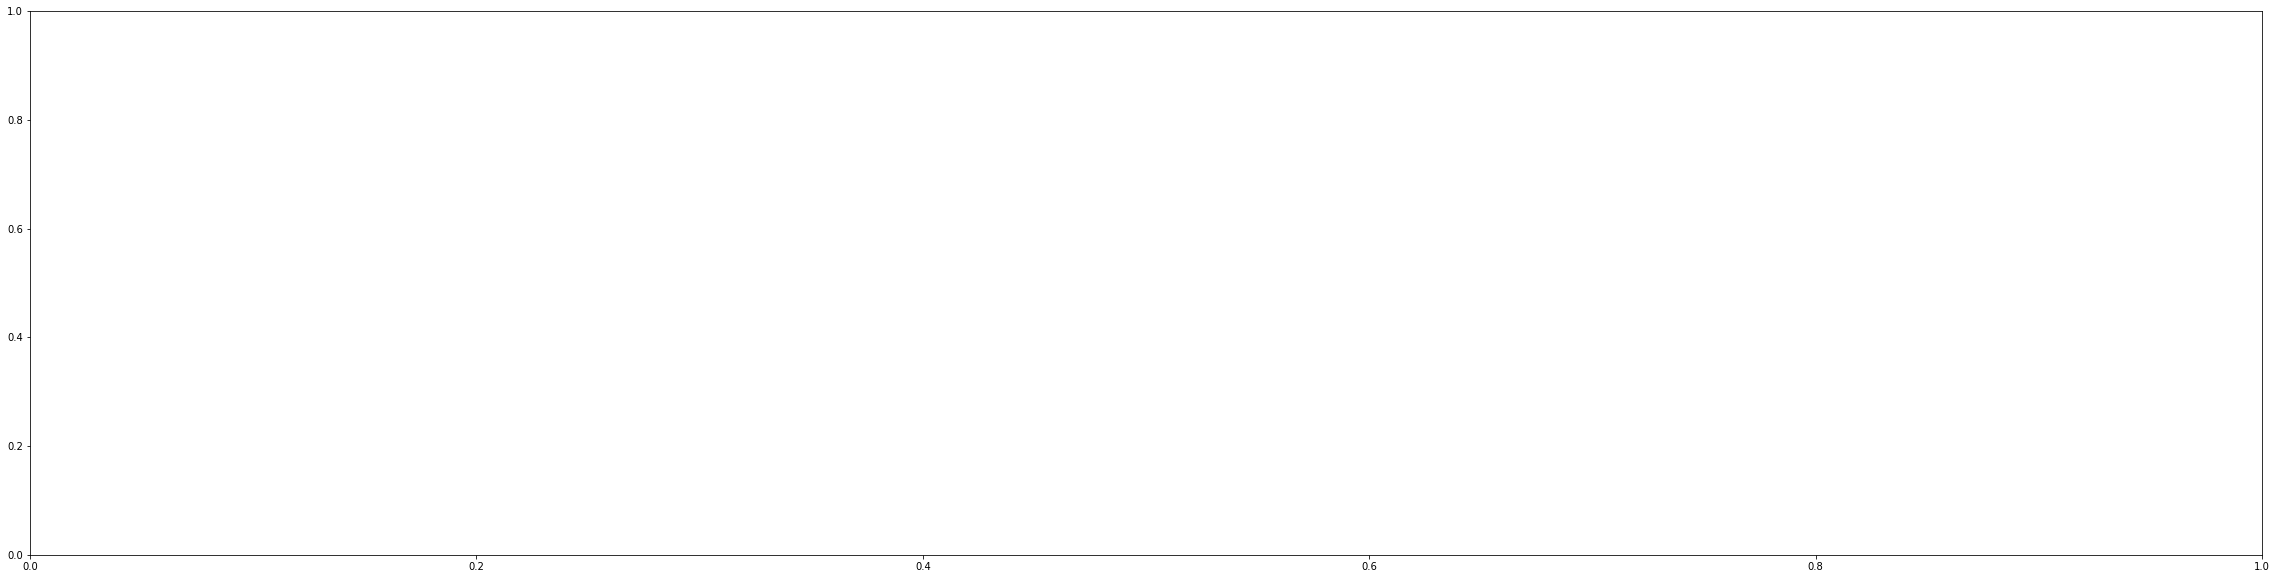

In [89]:
fig, ax = plt.subplots(figsize=(40,10))  
confusion_matrix= pd.crosstab(merged2, merged2, rownames=['Actual'], colnames=['Predicted'], margins=True)
sn.heatmap(confusion_matrix, annot=True)